In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
raw_data = pd.read_csv("Iris.csv")

In [3]:
raw_data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [17]:
raw_data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


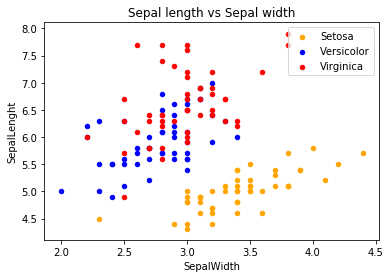

In [4]:
fig = raw_data[raw_data.Species == "Iris-setosa"].plot(kind='scatter',y='SepalLengthCm',x='SepalWidthCm',color='orange',label='Setosa')
raw_data[raw_data.Species == "Iris-versicolor"].plot(kind='scatter',y='SepalLengthCm',x='SepalWidthCm',color='blue',label='Versicolor',ax=fig)
raw_data[raw_data.Species == "Iris-virginica"].plot(kind='scatter',y='SepalLengthCm',x='SepalWidthCm',color='red',label='Virginica',ax=fig)

fig.set_ylabel('SepalLenght')
fig.set_xlabel('SepalWidth')
fig.set_title('Sepal length vs Sepal width')

fig= plt.gcf()
fig.show()

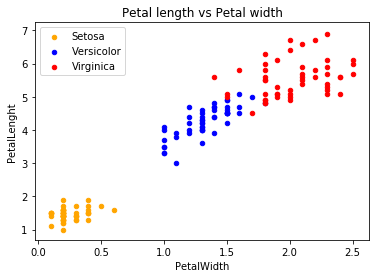

In [5]:
fig = raw_data[raw_data.Species == "Iris-setosa"].plot(kind='scatter',y='PetalLengthCm',x='PetalWidthCm',color='orange',label='Setosa')
raw_data[raw_data.Species == "Iris-versicolor"].plot(kind='scatter',y='PetalLengthCm',x='PetalWidthCm',color='blue',label='Versicolor',ax=fig)
raw_data[raw_data.Species == "Iris-virginica"].plot(kind='scatter',y='PetalLengthCm',x='PetalWidthCm',color='red',label='Virginica',ax=fig)

fig.set_ylabel('PetalLenght')
fig.set_xlabel('PetalWidth')
fig.set_title('Petal length vs Petal width')

fig= plt.gcf()
fig.show()

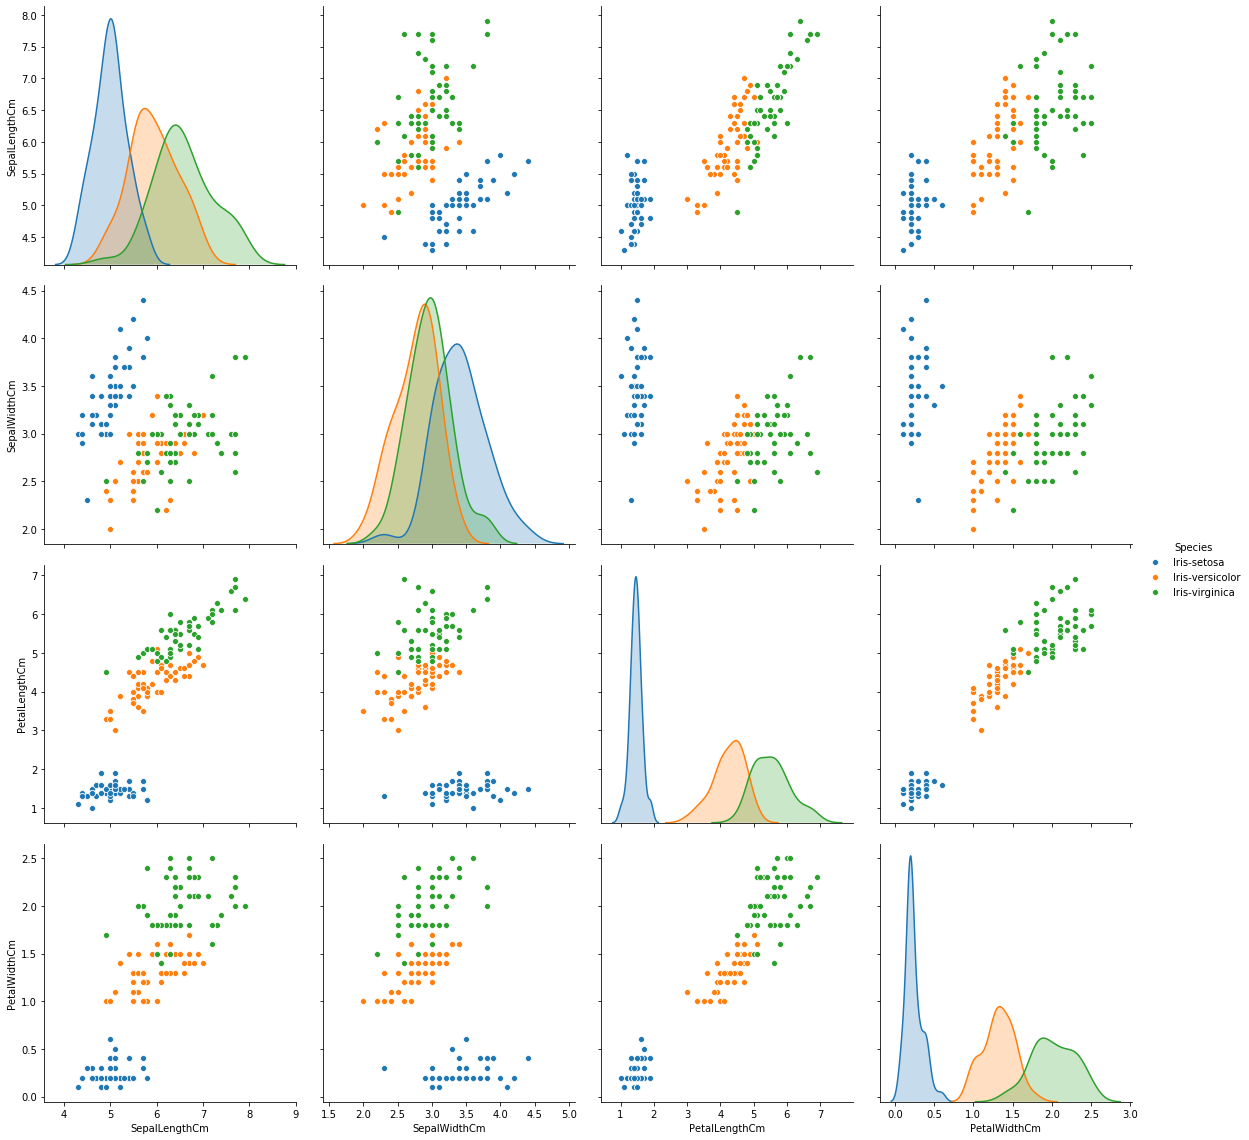

In [20]:
sns.pairplot(raw_data,hue='Species',height=4)

In [6]:
raw_data.drop("Id",axis = 1 , inplace=True)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [8]:
train,test = train_test_split(raw_data,test_size=0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [9]:
train_x = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y = train.Species

test_x = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y = test.Species

In [10]:
train_x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
147,6.5,3.0,5.2,2.0
22,4.6,3.6,1.0,0.2
56,6.3,3.3,4.7,1.6
74,6.4,2.9,4.3,1.3
16,5.4,3.9,1.3,0.4


In [11]:
test_x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
81,5.5,2.4,3.7,1.0
137,6.4,3.1,5.5,1.8
86,6.7,3.1,4.7,1.5
110,6.5,3.2,5.1,2.0
116,6.5,3.0,5.5,1.8


# Support Vector Machine SVM

In [35]:

def svm_classifier(train_x,train_y,test_x):
    model = svm.SVC()
    model.fit(train_x,train_y)

    prediction = model.predict(test_x)
    return metrics.accuracy_score(prediction,test_y)
print(f"Using SVM we get {svm_classifier(train_x,train_y,test_x)} accuracy")

Using SVM we get 0.9333333333333333 accuracy


/mnt/c/Users/subee/Desktop/shit/bashh/my_env/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Logistic Regression 

In [13]:
def svm_classifier(train_x,train_y,test_x):
model = LogisticRegression()
model.fit(train_x,train_y)
prediction = model.predict(test_x)
print(f"Using Logistic Regression we get {metrics.accuracy_score(prediction,test_y)} accuracy")

/mnt/c/Users/subee/Desktop/shit/bashh/my_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/mnt/c/Users/subee/Desktop/shit/bashh/my_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Using Logistic Regression we get 0.8666666666666667 accuracy


# Decision Tree 

In [14]:
def svm_classifier(train_x,train_y,test_x):model = DecisionTreeClassifier()
model.fit(train_x,train_y)
prediction = model.predict(test_x)
print(f"Using Decision Tree we get {metrics.accuracy_score(prediction,test_y)} accuracy")

Using Decision Tree we get 0.9333333333333333 accuracy


# K-Nearest Neighbors 

In [15]:
def svm_classifier(train_x,train_y,test_x):model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_x,train_y)
prediction = model.predict(test_x)
print(f"Using K-Nearest Neighbors we get {metrics.accuracy_score(prediction,test_y)} accuracy")

Using K-Nearest Neighbors we get 0.9555555555555556 accuracy


 For different values of n 

Using K-Nearest Neighbors we get 0.9555555555555556 accuracy for n_neighbors = 1
Using K-Nearest Neighbors we get 0.9555555555555556 accuracy for n_neighbors = 2
Using K-Nearest Neighbors we get 0.9555555555555556 accuracy for n_neighbors = 3
Using K-Nearest Neighbors we get 0.9777777777777777 accuracy for n_neighbors = 4
Using K-Nearest Neighbors we get 0.9555555555555556 accuracy for n_neighbors = 5
Using K-Nearest Neighbors we get 0.9777777777777777 accuracy for n_neighbors = 6
Using K-Nearest Neighbors we get 0.9555555555555556 accuracy for n_neighbors = 7
Using K-Nearest Neighbors we get 0.9555555555555556 accuracy for n_neighbors = 8
Using K-Nearest Neighbors we get 0.9555555555555556 accuracy for n_neighbors = 9
Using K-Nearest Neighbors we get 0.9777777777777777 accuracy for n_neighbors = 10


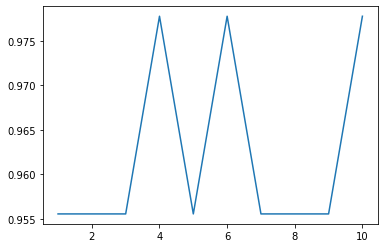

In [31]:
a_index = list(range(1,11))
a = []

for i in range(1,11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_x,train_y)
    prediction = model.predict(test_x)
    a.append((metrics.accuracy_score(prediction,test_y)))
    print(f"Using K-Nearest Neighbors we get {metrics.accuracy_score(prediction,test_y)} accuracy for n_neighbors = {i}")
    
plt.plot(a_index,a)